In [81]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


mobile =pd.read_csv("train.csv",sep=",")
print("nbr_ligne => ",mobile.shape[0])
print("nbr_colonne=> ",mobile.shape[1])
mobile.head()


nbr_ligne =>  2000
nbr_colonne=>  21


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<AxesSubplot:>

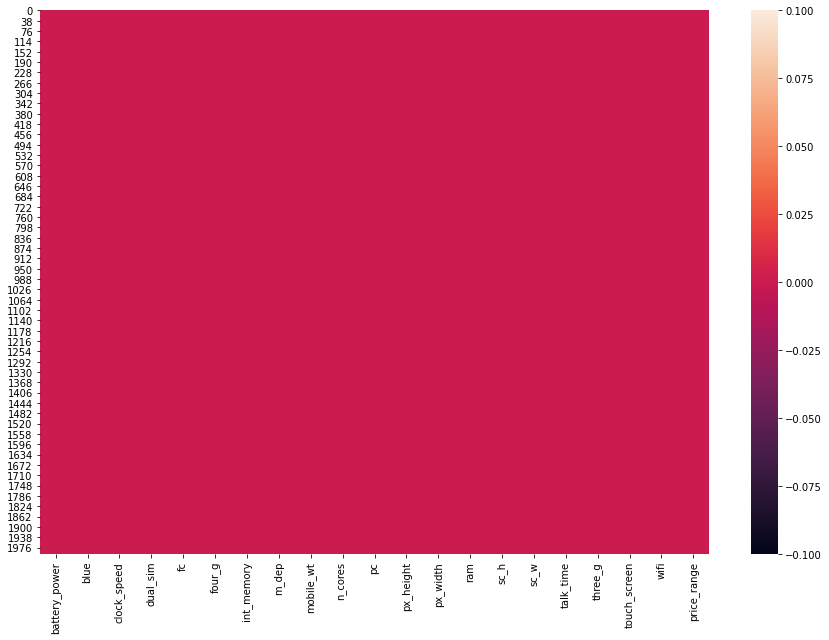

In [2]:
                         ########### exploration de donnnees #########
    #### analyse de forme ###

plt.figure(figsize=(15,10))
sns.heatmap(mobile.isna())

In [3]:
mobile.isna().sum()/mobile.shape[1]  ##nan

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [4]:
mobile.dtypes.value_counts() ##type variables 

int64      19
float64     2
dtype: int64

In [5]:
print("var_int =>",mobile.select_dtypes("int64").columns)
print(" ")
print("var_col =>",mobile.select_dtypes("float64").columns)

var_int => Index(['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')
 
var_col => Index(['clock_speed', 'm_dep'], dtype='object')


0    500
1    500
2    500
3    500
Name: price_range, dtype: int64


c:\users\packard bell\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price_range', ylabel='count'>

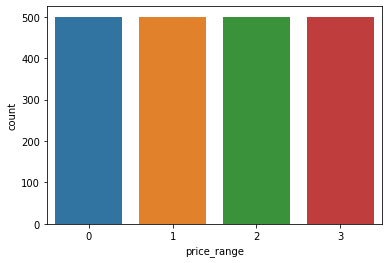

In [6]:
print(mobile['price_range'].value_counts())
sns.countplot(mobile['price_range'])
#k=np.arange(1,2001)
#plt.scatter(mobile['price_range'],k)

In [64]:
# ##### Analyse de fond ######
# for col in mobile.select_dtypes('int64'):
#     plt.figure()
#     sns.displot(mobile,x=mobile[col],hue="price_range",palette="ch:rot=-.25,hue=1,light=.75")

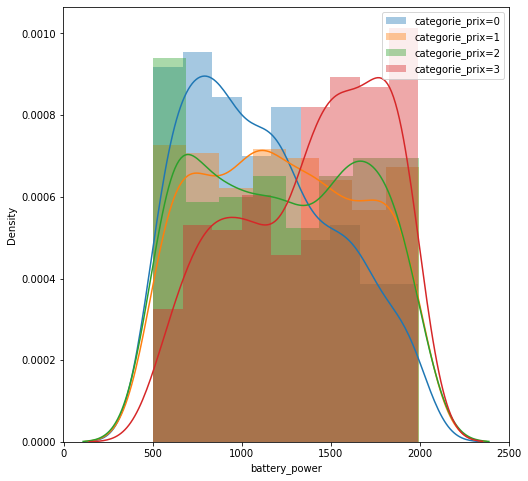

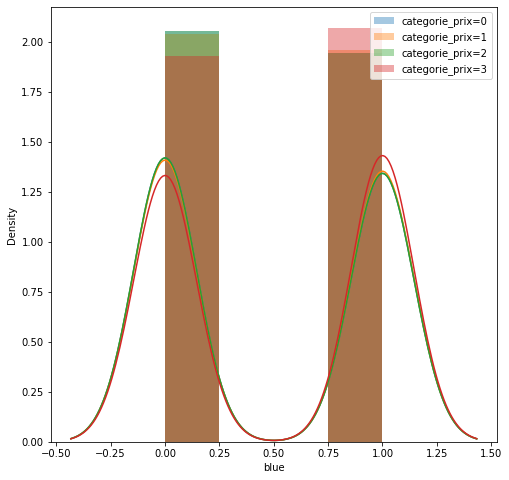

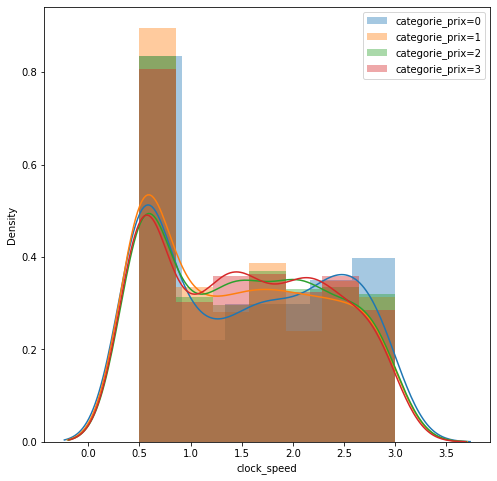

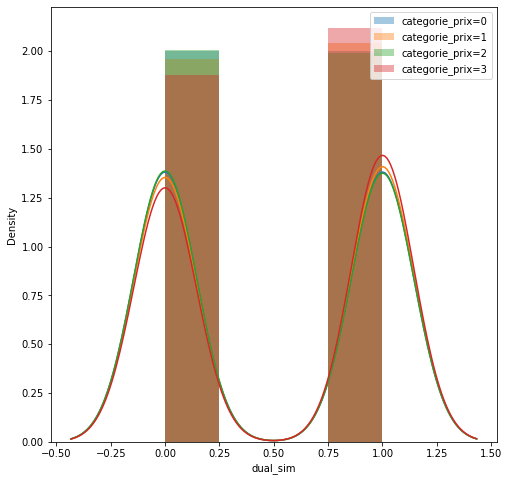

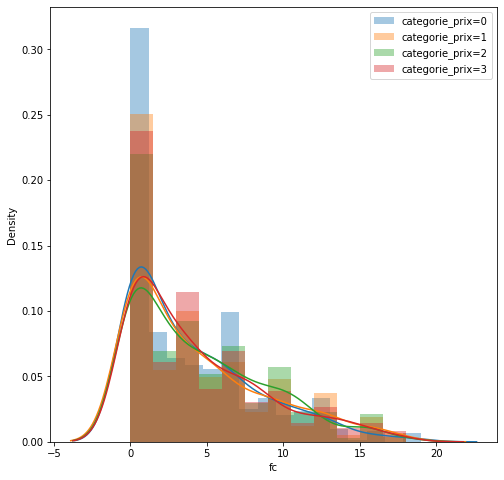

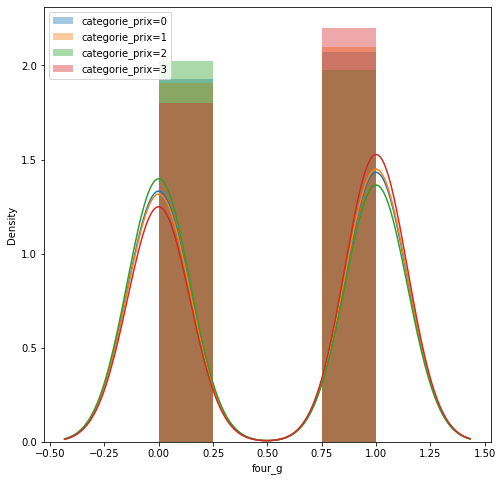

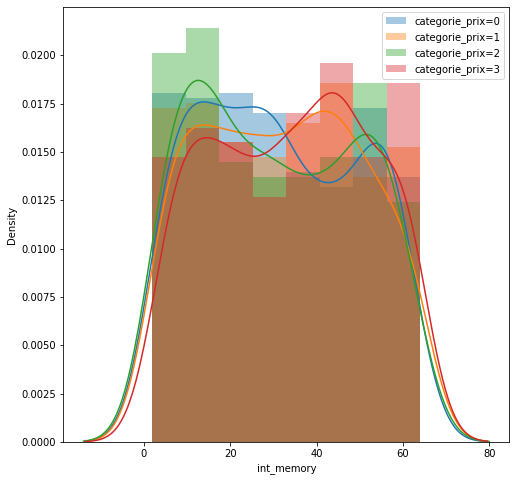

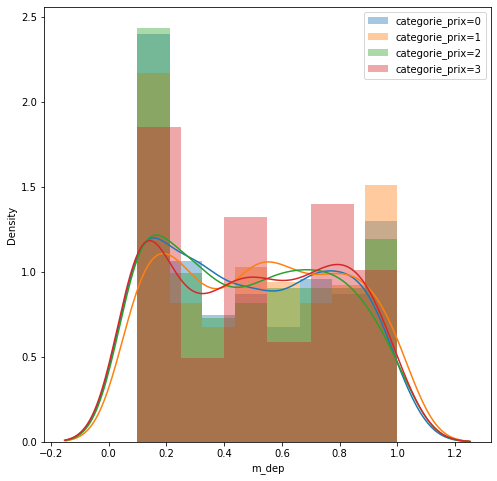

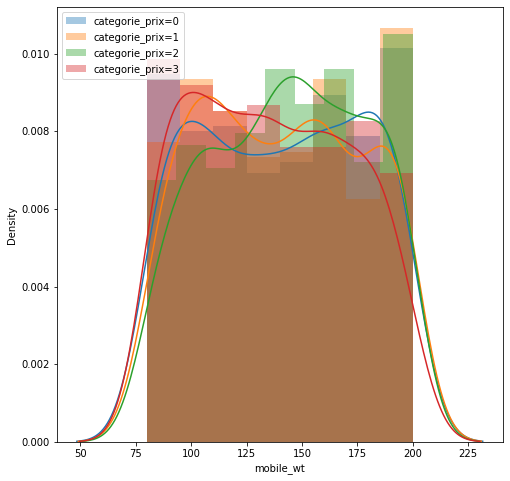

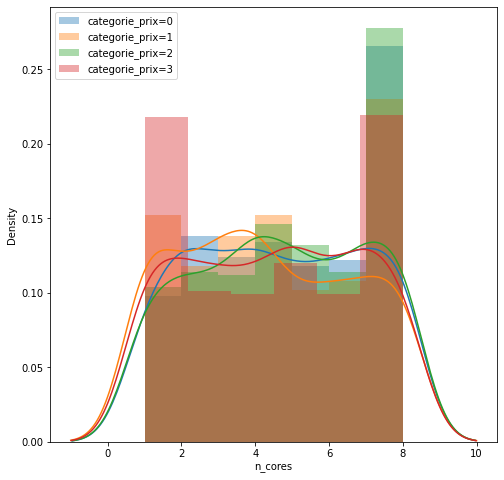

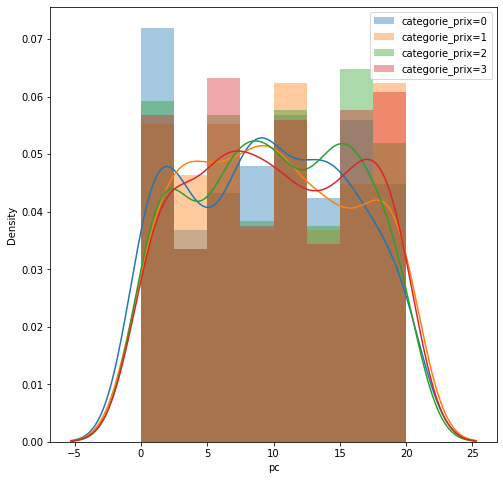

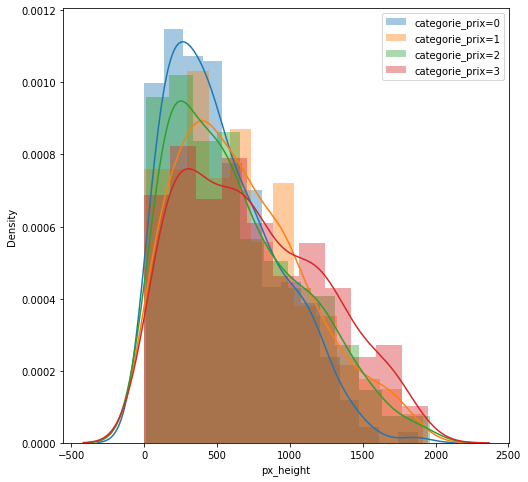

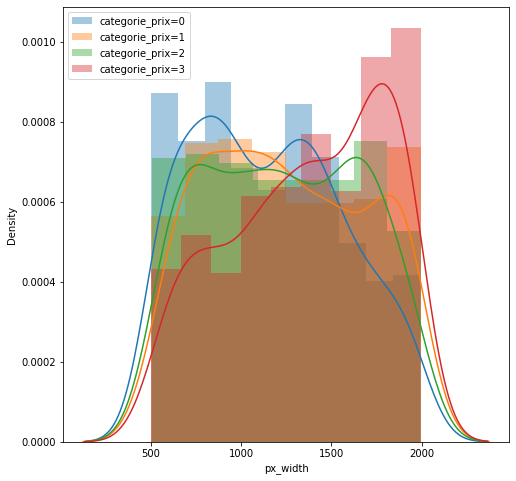

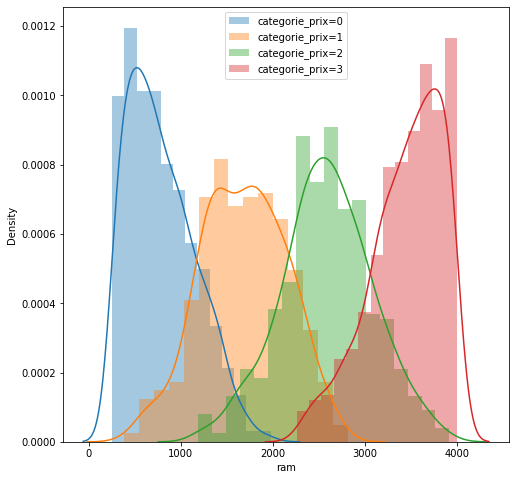

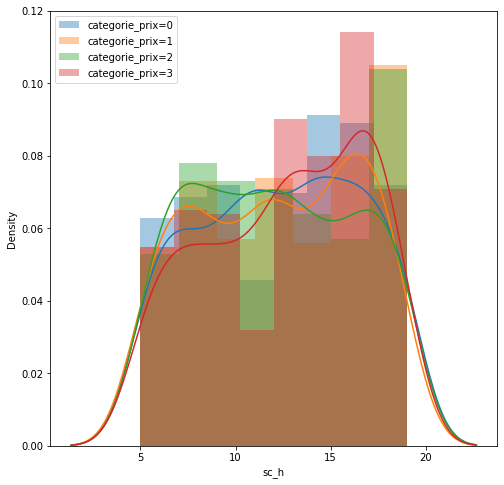

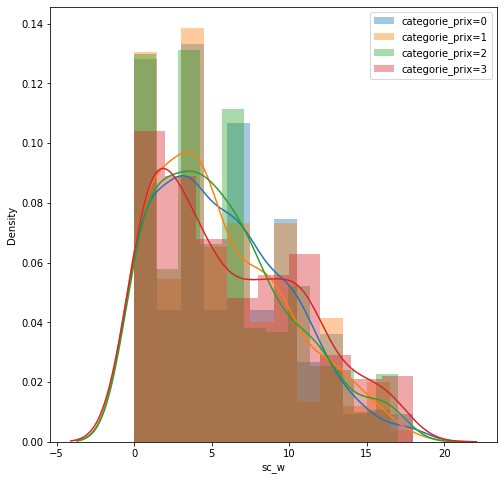

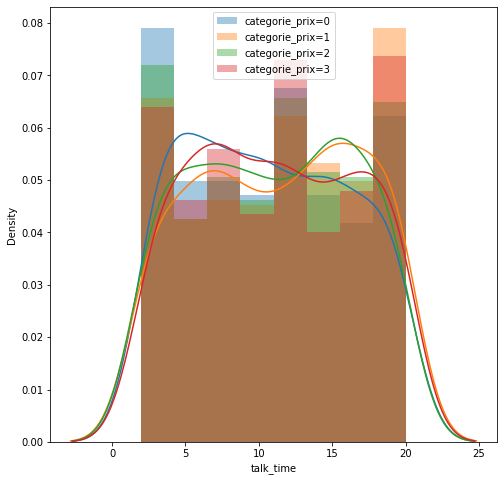

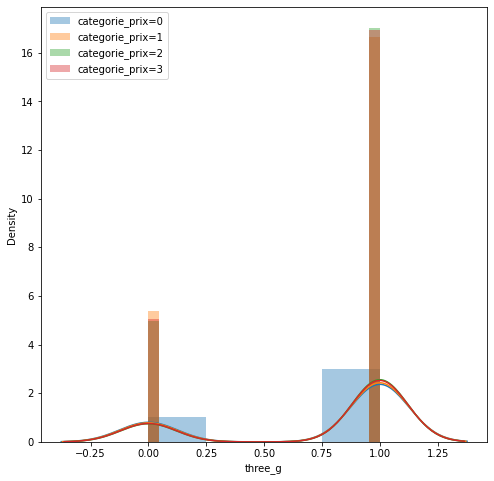

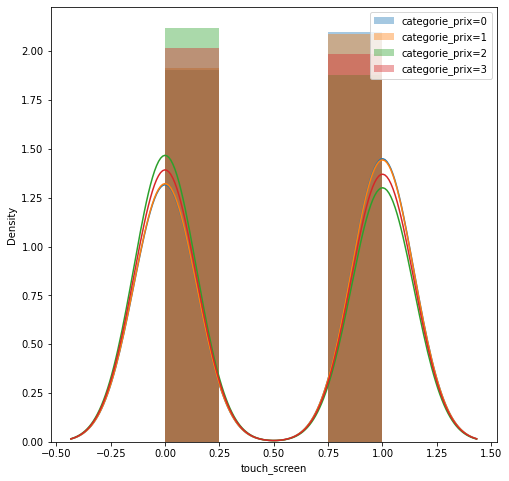

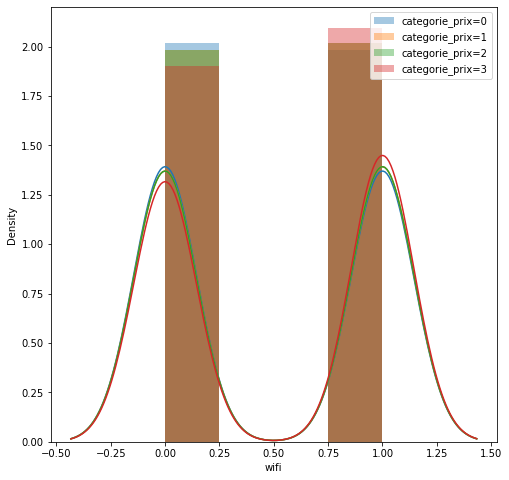

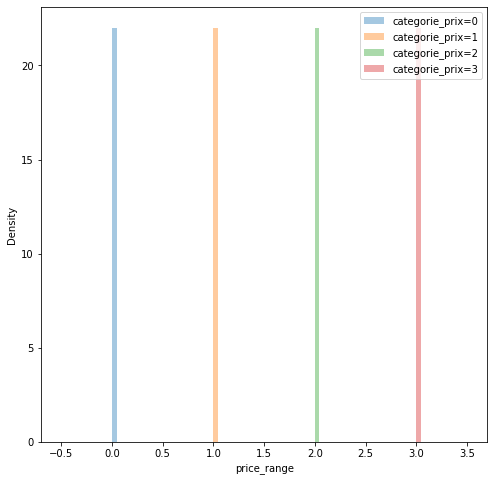

In [8]:
import warnings
warnings.filterwarnings("ignore")

categ_0=mobile[mobile['price_range']==0]
categ_1=mobile[mobile['price_range']==1]
categ_2=mobile[mobile['price_range']==2]
categ_3=mobile[mobile['price_range']==3]

for col in mobile:
    plt.figure(figsize=(8,8))
    sns.distplot(categ_0[col],label="categorie_prix=0")
    sns.distplot(categ_1[col],label="categorie_prix=1")
    sns.distplot(categ_2[col],label="categorie_prix=2")
    sns.distplot(categ_3[col],label="categorie_prix=3")
    plt.legend()
    

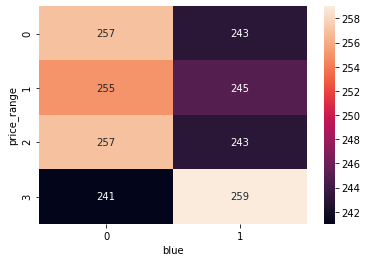

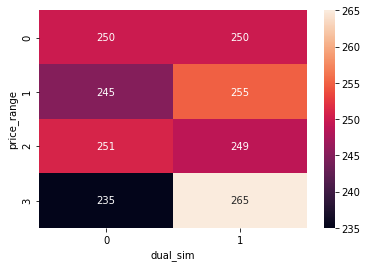

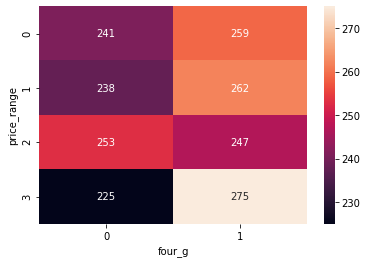

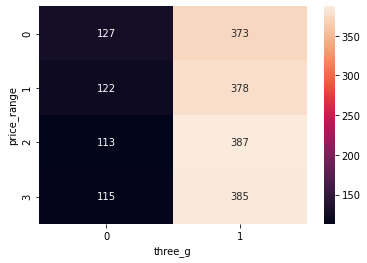

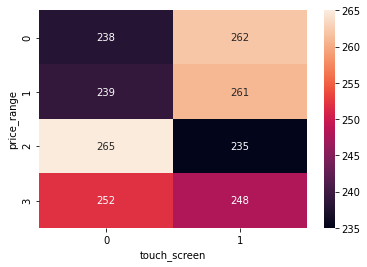

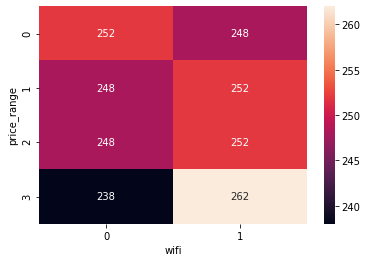

In [7]:
var_qualt=["blue","dual_sim","four_g","three_g","touch_screen","wifi"]
for col in var_qualt :
    plt.figure()
    sns.heatmap(pd.crosstab(mobile['price_range'],mobile[col]),annot=True,fmt='d')
                
    

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64
battery_power-----------------H0 rejette
blue--------------------------0
clock_speed-------------------0
dual_sim----------------------0
fc----------------------------0
four_g------------------------0
int_memory--------------------0
m_dep-------------------------0
mobile_wt---------------------0
n_cores-----------------------0
pc----------------------------0
px_height---------------------H0 rejette
px_width----------

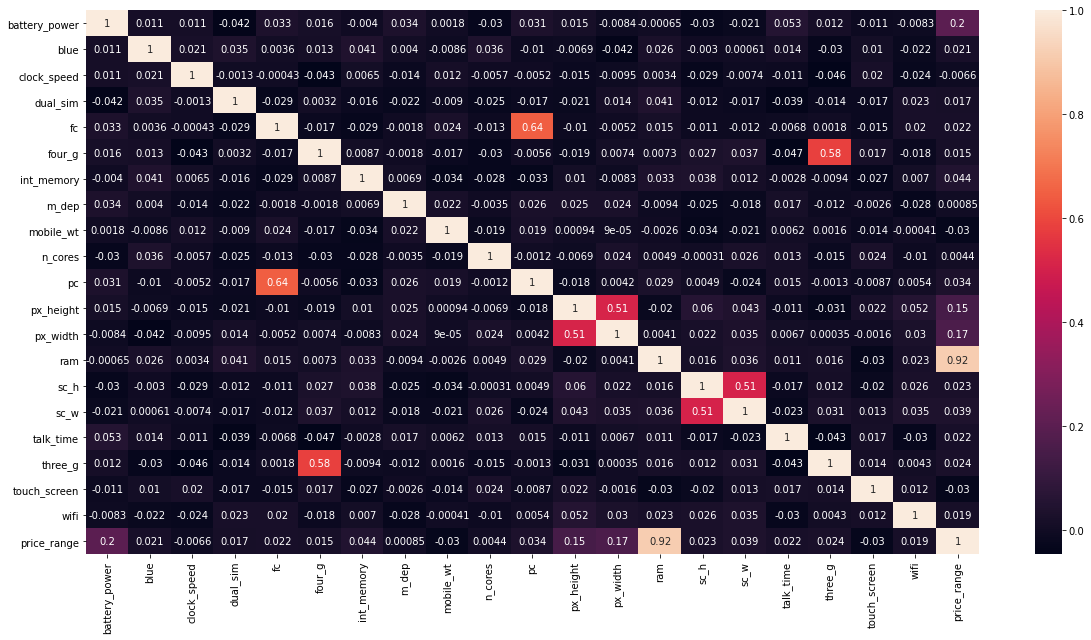

In [92]:
from scipy.stats import *
                 #### analyse plus detailles ###

print(mobile.corr()['price_range'])
plt.figure(figsize=(20,10))
sns.heatmap(mobile.corr(),annot=True)

def test(col):
    alpha=0.02
    stat,p=ttest_ind(categ_0[col].dropna(),categ_1[col].dropna())
    
    if(p<alpha):
        return 'H0 rejette'
    else:
        return 0
        
for col,row in mobile.items():
     print(f'{col :-<30}{test(col)}')
    
    
    

(1500, 20)
(1500,)
(500, 20)
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.94      0.93      0.93       110
           2       0.90      0.95      0.93       125
           3       0.99      0.95      0.97       141

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.96      0.95      0.95       500

[ 112  365  618  871 1125]


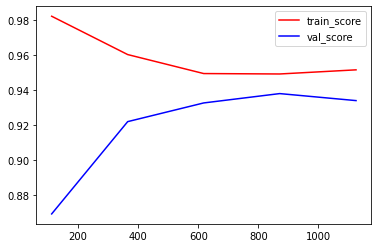

In [3]:
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.preprocessing import * 
from sklearn.discriminant_analysis import *
from sklearn.metrics import *



# mobile_test=pd.read_csv('test.csv',sep=',')
# mobile_test_2=mobile_test.drop("id",axis=1)

########## preprocessing ##############
def standarisation(data):
    trans=StandardScaler()
    trans.fit(data)
    data1=trans.transform(data)
    
    return data1 

def donnees(data):
    standarisation(data)
    
    y=data['price_range']
    x=data.drop('price_range',axis=1)
   
    return x,y


x,y=donnees(mobile)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=0)


print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)

def modele_base(modele):
    modele.fit(xtrain,ytrain)
    ypred=modele.predict(xtest)
    print(classification_report(ytest,ypred))
    
    
    ##verfication d'underffiting et d'overfitting
    N,train_score,val_score=learning_curve(modele,xtrain,ytrain,train_sizes=np.linspace(0.1,1,5),cv=4) 
    print(N)
    plt.figure()
    plt.plot(N,train_score.mean(axis=1),c='r',label='train_score')
    plt.plot(N,val_score.mean(axis=1),c='b',label='val_score')
    plt.legend()
    plt.show()


    
modele_base(LinearDiscriminantAnalysis())
    




analyse_discriminate_lineaire
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       124
           1       0.91      0.94      0.92       110
           2       0.91      0.94      0.92       125
           3       0.99      0.95      0.97       141

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

[ 112  365  618  871 1125]


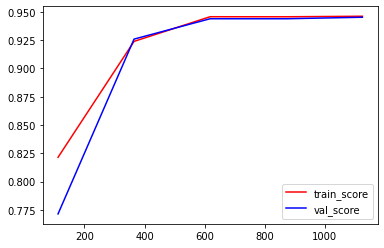


kneighbrsclassifier
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       124
           1       0.92      0.90      0.91       110
           2       0.91      0.86      0.88       125
           3       0.92      0.95      0.93       141

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

[ 112  365  618  871 1125]


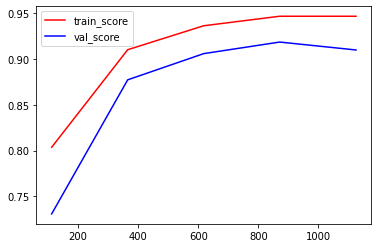


suppor_vector_machine_classifier
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       124
           1       0.95      0.95      0.95       110
           2       0.96      0.92      0.94       125
           3       0.96      0.97      0.96       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

[ 112  365  618  871 1125]


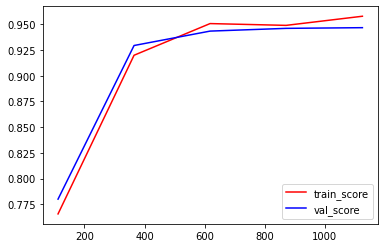


arbre_decision
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       124
           1       0.83      0.86      0.85       110
           2       0.81      0.77      0.79       125
           3       0.88      0.89      0.88       141

    accuracy                           0.87       500
   macro avg       0.86      0.87      0.86       500
weighted avg       0.87      0.87      0.87       500

[ 112  365  618  871 1125]


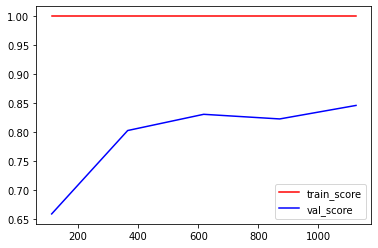


random_forest_classifier
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       124
           1       0.91      0.88      0.89       110
           2       0.86      0.85      0.85       125
           3       0.92      0.93      0.92       141

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

[ 112  365  618  871 1125]


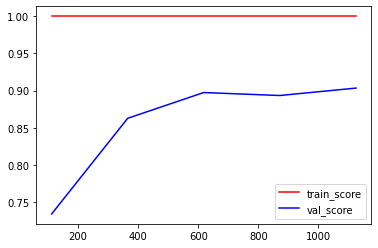

In [4]:
from sklearn.pipeline import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.tree import *
from sklearn.ensemble import * 


LDA=make_pipeline(SelectKBest(f_classif,k=5),LinearDiscriminantAnalysis())
KNE=make_pipeline(SelectKBest(f_classif,k=5),KNeighborsClassifier())
SV=make_pipeline(SelectKBest(f_classif,k=5),SVC())
DTC=make_pipeline(SelectKBest(f_classif,k=5),DecisionTreeClassifier())
RFC=make_pipeline(SelectKBest(f_classif,k=5),RandomForestClassifier())

modeles={
    'analyse_discriminate_lineaire':LDA,
    'kneighbrsclassifier':KNE,
    'suppor_vector_machine_classifier':SV,
    'arbre_decision':DTC,
    'random_forest_classifier':RFC,
}

for cle,valeur in modeles.items():
    print(cle)
    modele_base(valeur)
    print("")

    
    
    


In [ ]:
###### optimisation #######
print(SV.get_params())
params={
    "svc__kernel":['rbf','linear','poly','sigmoid'],
    "svc__verbose":[True,False],
    #"selectkbest__k":np.arange(5,19),
    
}

grid=GridSearchCV(SV,params,cv=4)
grid.fit(xtrain,ytrain)
print(grid.best_score_)
